# Example using nltk for preprocessing text

**NOTE:**
You will be prompted to upload a text file from your Google Drive.

If you would like to use the file that was used in this example, copy it from this link to your Google Drive:

https://github.com/gal-a/blog/blob/master/docs/notebooks/nlp/data/quotes.txt

In [1]:
# Setup
!pip install -q wordcloud
import wordcloud

import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger') 

import pandas as pd
import matplotlib.pyplot as plt
import io
import unicodedata
import numpy as np
import re
import string

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [0]:
# Constants
# POS (Parts Of Speech) for: nouns, adjectives, verbs and adverbs
DI_POS_TYPES = {'NN':'n', 'JJ':'a', 'VB':'v', 'RB':'r'} 
POS_TYPES = list(DI_POS_TYPES.keys())

# Constraints on tokens
MIN_STR_LEN = 3
RE_VALID = '[a-zA-Z]'

## Load the corpus file from Google Drive

In [6]:
# Upload from google drive
from google.colab import files
uploaded = files.upload()
print("len(uploaded.keys():", len(uploaded.keys()))

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(name=fn, length=len(uploaded[fn])))

# Get list of quotes
df_quotes = pd.read_csv(io.StringIO(uploaded['quotes.txt'].decode('utf-8')), sep='\t')
  
# Display
print("df_quotes:")
print(df_quotes.head().to_string())
print(df_quotes.describe())

# Convert quotes to list
li_quotes = df_quotes['Quote'].tolist()
print()
print("len(li_quotes):", len(li_quotes))

Saving quotes.txt to quotes.txt
len(uploaded.keys(): 1
User uploaded file "quotes.txt" with length 6409 bytes
df_quotes:
            Author                                                                                                                                                                                      Quote
0  Agatha Christie  I like living. I have sometimes been wildly, despairingly, acutely miserable, racked with sorrow; but through it all I still know quite certainly that just to be alive is a grand thing.
1  Agatha Christie                                                                                The impossible could not have happened, therefore the impossible must be possible in spite of appearances. 
2  Agatha Christie                                                                                                       Poirot, I said. I have been thinking. An admirable exercise my friend. Continue it. 
3  Agatha Christie                                     

## Tokenize sentences and words, remove stopwords, use stemmer & lemmatizer

First, a note on the difference between Stemming vs Lemmatization:

* Stemming: Trying to shorten a word with simple regex rules

* Lemmatization: Trying to find the root word with linguistics rules (with the use of regex rules)

In [9]:
# Get stopwords, stemmer and lemmatizer
stopwords = nltk.corpus.stopwords.words('english')
stemmer = nltk.stem.PorterStemmer()
lemmatizer = nltk.stem.WordNetLemmatizer()

# Remove accents function
def remove_accents(data):
    return ''.join(x for x in unicodedata.normalize('NFKD', data) if x in string.ascii_letters or x == " ")

# Process all quotes
li_tokens = []
li_token_lists = []
li_lem_strings = []

for i,text in enumerate(li_quotes):
    # Tokenize by sentence, then by lowercase word
    tokens = [word.lower() for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]

    # Process all tokens per quote
    li_tokens_quote = []
    li_tokens_quote_lem = []
    for token in tokens:
        # Remove accents
        t = remove_accents(token)

        # Remove punctuation
        t = str(t).translate(string.punctuation)
        li_tokens_quote.append(t)
        
        # Add token that represents "no lemmatization match"
        li_tokens_quote_lem.append("-") # this token will be removed if a lemmatization match is found below

        # Process each token
        if t not in stopwords:
            if re.search(RE_VALID, t):
                if len(t) >= MIN_STR_LEN:
                    # Note that the POS (Part Of Speech) is necessary as input to the lemmatizer 
                    # (otherwise it assumes the word is a noun)
                    pos = nltk.pos_tag([t])[0][1][:2]
                    pos2 = 'n'  # set default to noun
                    if pos in DI_POS_TYPES:
                      pos2 = DI_POS_TYPES[pos]
                    
                    stem = stemmer.stem(t)
                    lem = lemmatizer.lemmatize(t, pos=pos2)  # lemmatize with the correct POS
                    
                    if pos in POS_TYPES:
                        li_tokens.append((t, stem, lem, pos))

                        # Remove the "-" token and append the lemmatization match
                        li_tokens_quote_lem = li_tokens_quote_lem[:-1] 
                        li_tokens_quote_lem.append(lem)

    # Build list of token lists from lemmatized tokens
    li_token_lists.append(li_tokens_quote)
    
    # Build list of strings from lemmatized tokens
    str_li_tokens_quote_lem = ' '.join(li_tokens_quote_lem)
    li_lem_strings.append(str_li_tokens_quote_lem)
    
# Build resulting dataframes from lists
df_token_lists = pd.DataFrame(li_token_lists)

print("df_token_lists.head(5):")
print(df_token_lists.head(5).to_string())

# Replace None with empty string
for c in df_token_lists:
    if str(df_token_lists[c].dtype) in ('object', 'string_', 'unicode_'):
        df_token_lists[c].fillna(value='', inplace=True)

df_lem_strings = pd.DataFrame(li_lem_strings, columns=['lem quote'])

print()
print("")
print("df_lem_strings.head():")
print(df_lem_strings.head().to_string())

df_token_lists.head(5):
          0           1       2          3         4         5          6          7         8           9            10         11        12         13      14      15           16      17    18    19       20    21    22    23     24    25     26         27    28    29    30    31     32    33    34     35     36    37    38    39    40    41    42    43    44    45    46    47    48    49    50    51    52    53    54    55    56    57    58    59    60    61    62    63    64    65    66    67    68    69    70    71    72    73    74    75    76    77    78    79    80    81    82    83    84    85    86    87
0         i        like  living                    i      have  sometimes       been    wildly              despairingly              acutely  miserable          racked         with  sorrow         but  through    it   all     i  still  know  quite  certainly  that  just    to    be  alive    is     a  grand  thing        None  None  None  None  None 

## Process results, find the most popular lemmatized words and group results by Part of Speech (POS)

In [10]:
# Add counts
print("Group by lemmatized words, add count and sort:")
df_all_words = pd.DataFrame(li_tokens, columns=['token', 'stem', 'lem', 'pos'])
df_all_words['counts'] = df_all_words.groupby(['lem'])['lem'].transform('count')
df_all_words = df_all_words.sort_values(by=['counts', 'lem'], ascending=[False, True]).reset_index()

print("Get just the first row in each lemmatized group")
df_words = df_all_words.groupby('lem').first().sort_values(by='counts', ascending=False).reset_index()
print("df_words.head(10):")
print(df_words.head(10))

Group by lemmatized words, add count and sort:
Get just the first row in each lemmatized group
df_words.head(10):
          lem  index       token    stem pos  counts
0      always     50      always   alway  RB       9
1        life     54        life    life  NN       6
2     nothing    116     nothing    noth  NN       6
3        fact    106        fact    fact  NN       5
4         man     74         man     man  NN       5
5        give     39        gave    gave  VB       5
6        work    297        work    work  NN       4
7  impossible     15  impossible  imposs  JJ       4
8        come    180       comes    come  VB       4
9       world    121       world   world  NN       4


## Top 10 words per Part Of Speech (POS)

In [11]:
df_words = df_words[['lem', 'pos', 'counts']].head(200)
for v in POS_TYPES:
    df_pos = df_words[df_words['pos'] == v]
    print()
    print("POS_TYPE:", v)
    print(df_pos.head(10).to_string())


POS_TYPE: NN
          lem pos  counts
1        life  NN       6
2     nothing  NN       6
3        fact  NN       5
4         man  NN       5
6        work  NN       4
9       world  NN       4
10     theory  NN       4
11  happiness  NN       4
16      truth  NN       3
18      order  NN       3

POS_TYPE: JJ
              lem pos  counts
7      impossible  JJ       4
14        certain  JJ       3
19        curious  JJ       3
33           good  JJ       2
42           nice  JJ       2
45         little  JJ       2
52     improbable  JJ       2
53           best  JJ       2
59  philosophical  JJ       1
68       possible  JJ       1

POS_TYPE: VB
          lem pos  counts
5        give  VB       5
8        come  VB       4
12        say  VB       4
13      think  VB       3
20       make  VB       3
31  eliminate  VB       2
32        see  VB       2
47       lose  VB       2
49       wish  VB       2
57     ignore  VB       2

POS_TYPE: RB
           lem pos  counts
0       always 

## Sorted frequency plot for all words

li_token_lists_flat[:10]: ['i', 'like', 'living', '', 'i', 'have', 'sometimes', 'been', 'wildly', '']
[('the', 46), ('is', 35), ('to', 29), ('a', 27), ('i', 23), ('it', 21), ('in', 19), ('and', 19), ('be', 18), ('you', 17), ('of', 16), ('that', 15), ('have', 12), ('but', 12), ('not', 11), ('he', 10), ('all', 9), ('always', 9), ('will', 9), ('one', 9), ('there', 9), ('me', 9), ('for', 8), ('when', 8), ('they', 8), ('like', 7), ('with', 7), ('must', 7), ('my', 7), ('do', 7), ('we', 7), ('what', 7), ('life', 6), ('if', 6), ('nothing', 6), ('are', 5), ('s', 5), ('man', 5), ('am', 5), ('would', 5), ('impossible', 4), ('said', 4), ('can', 4), ('most', 4), ('give', 4), ('nt', 4), ('has', 4), ('who', 4), ('happiness', 4), ('world', 4), ('only', 4), ('more', 4), ('this', 4), ('his', 4), ('or', 4), ('work', 4), ('still', 3), ('an', 3), ('certain', 3), ('truth', 3), ('however', 3), ('curious', 3), ('them', 3), ('was', 3), ('fit', 3), ('facts', 3), ('never', 3), ('may', 3), ('on', 3), ('himself', 

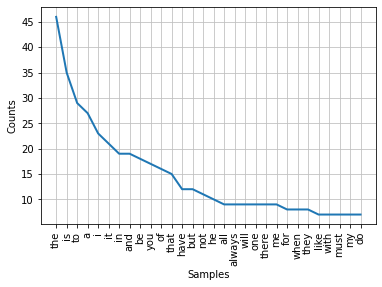

In [12]:
li_token_lists_flat = [y for x in li_token_lists for y in x]  # flatten the list of token lists to a single list
print("li_token_lists_flat[:10]:", li_token_lists_flat[:10])

di_freq = nltk.FreqDist(li_token_lists_flat)
del di_freq['']
li_freq_sorted = sorted(di_freq.items(), key=lambda x: x[1], reverse=True)  # sorted list
print(li_freq_sorted)
    
di_freq.plot(30, cumulative=False)

## ## Sorted frequency plot for Lemmatized  words after removing stopwords

[('always', 9), ('life', 6), ('nothing', 6), ('fact', 5), ('give', 5), ('man', 5), ('come', 4), ('happiness', 4), ('impossible', 4), ('say', 4), ('theory', 4), ('work', 4), ('world', 4), ('certain', 3), ('curious', 3), ('fit', 3), ('however', 3), ('make', 3), ('never', 3), ('order', 3), ('still', 3), ('think', 3), ('truth', 3), ('artist', 2), ('attention', 2), ('best', 2), ('die', 2), ('dog', 2), ('dull', 2), ('eliminate', 2), ('felt', 2), ('fine', 2), ('friend', 2), ('good', 2), ('help', 2), ('holmes', 2), ('ignore', 2), ('imagination', 2), ('improbable', 2), ('incident', 2), ('know', 2), ('little', 2), ('living', 2), ('lose', 2), ('nice', 2), ('nighttime', 2), ('person', 2), ('quite', 2), ('really', 2), ('remains', 2), ('see', 2), ('sherlock', 2), ('storm', 2), ('suit', 2), ('tea', 2), ('thing', 2), ('time', 2), ('watson', 2), ('wish', 2), ('abhor', 1), ('able', 1), ('abstruse', 1), ('accountable', 1), ('acutely', 1), ('admirable', 1), ('adventure', 1), ('advice', 1), ('alive', 1), (

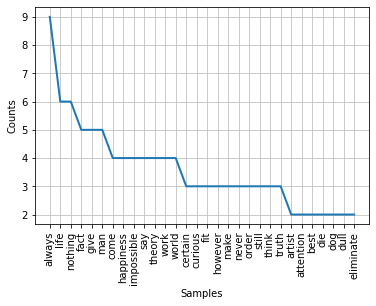

In [13]:
li_lem_words = df_all_words['lem'].tolist()
di_freq2 = nltk.FreqDist(li_lem_words)
li_freq_sorted2 = sorted(di_freq2.items(), key=lambda x: x[1], reverse=True)  # sorted list
print(li_freq_sorted2)
    
di_freq2.plot(30, cumulative=False)